In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

#importing dataset
df_2010_2011=pd.read_excel("../RFM/online_retail_II.xlsx", sheet_name="Year 2010-2011")

In [5]:
df=df_2010_2011.copy()

In [6]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [7]:
df.shape

(541910, 8)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      541910 non-null  object        
 1   StockCode    541910 non-null  object        
 2   Description  540456 non-null  object        
 3   Quantity     541910 non-null  int64         
 4   InvoiceDate  541910 non-null  datetime64[ns]
 5   Price        541910 non-null  float64       
 6   Customer ID  406830 non-null  float64       
 7   Country      541910 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [9]:
#missing values
df.isnull().sum()

Invoice             0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
Price               0
Customer ID    135080
Country             0
dtype: int64

In [10]:
# look at number of missing values in terms of %
round(100*(df.isnull().sum()/len(df.index)),2)

Invoice         0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
Price           0.00
Customer ID    24.93
Country         0.00
dtype: float64

In [11]:
#drop all rows having missing values
df=df.dropna()
df.shape

(406830, 8)

In [13]:
#Create new column : amount
df['amount']=df['Quantity']*df['Price']

In [14]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


RFM Analysis

R (Recency) : Number of days since last purchase
F (Frequency) : Number or transactions
M (Monetary) : Total amount of transactions(revenue contributed by the customer)

In [16]:
#monetary
grouped_df=df.groupby('Customer ID')['amount'].sum()
grouped_df=grouped_df.reset_index()
grouped_df.head()

,Customer ID,amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [17]:
#frequency
frequency=df.groupby('Customer ID')['Invoice'].count()
frequency=frequency.reset_index()
frequency.columns=['Customer ID','frequency']  #rename columns
frequency.head()

,Customer ID,frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [18]:
#merge the grouped_df and frequency dataframe
grouped_df=pd.merge(grouped_df,frequency,on='Customer ID',how='inner')
grouped_df.head()

,Customer ID,amount,frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [19]:
#recency
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406830 entries, 0 to 541909
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      406830 non-null  object        
 1   StockCode    406830 non-null  object        
 2   Description  406830 non-null  object        
 3   Quantity     406830 non-null  int64         
 4   InvoiceDate  406830 non-null  datetime64[ns]
 5   Price        406830 non-null  float64       
 6   Customer ID  406830 non-null  float64       
 7   Country      406830 non-null  object        
 8   amount       406830 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 31.0+ MB


In [20]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'],
                                       format='%d-%m-%Y %H:%M')
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406830 entries, 0 to 541909
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      406830 non-null  object        
 1   StockCode    406830 non-null  object        
 2   Description  406830 non-null  object        
 3   Quantity     406830 non-null  int64         
 4   InvoiceDate  406830 non-null  datetime64[ns]
 5   Price        406830 non-null  float64       
 6   Customer ID  406830 non-null  float64       
 7   Country      406830 non-null  object        
 8   amount       406830 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 31.0+ MB


In [22]:
#compute the max date for reference date
max_date=max(df['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [23]:
#compue the diff
df['diff']=max_date-df['InvoiceDate']
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,amount,diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [24]:
#recency
last_purchase=df.groupby('Customer ID')['diff'].min()
last_purchase=last_purchase.reset_index()
last_purchase.head()

,Customer ID,diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [25]:
#merge above dataframe to grouped_df
grouped_df=pd.merge(grouped_df,last_purchase,on='Customer ID',how='inner')
grouped_df.head()

,Customer ID,amount,frequency,diff
0,12346.0,0.00,2,325 days 02:33:00
1,12347.0,4310.00,182,1 days 20:58:00
2,12348.0,1797.24,31,74 days 23:37:00
3,12349.0,1757.55,73,18 days 02:59:00
4,12350.0,334.40,17,309 days 20:49:00


In [26]:
#update columns names of grouped_df
grouped_df.columns=['Customer ID','amount','frequency','recency']
grouped_df.head()

,Customer ID,amount,frequency,recency
0,12346.0,0.00,2,325 days 02:33:00
1,12347.0,4310.00,182,1 days 20:58:00
2,12348.0,1797.24,31,74 days 23:37:00
3,12349.0,1757.55,73,18 days 02:59:00
4,12350.0,334.40,17,309 days 20:49:00


In [28]:
import datetime as dt

In [29]:
#extract number of days
grouped_df['recency']=grouped_df['recency'].dt.days
grouped_df.head()

,Customer ID,amount,frequency,recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


{'whiskers': [<matplotlib.lines.Line2D at 0x1c1519a62b0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c1519a6970>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c151995f10>],
 'medians': [<matplotlib.lines.Line2D at 0x1c1519af070>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c1519af3d0>],
 'means': []}

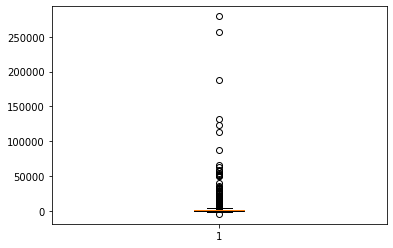

In [30]:
plt.boxplot(grouped_df['amount'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1c15674e0d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c15674e790>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c156745d60>],
 'medians': [<matplotlib.lines.Line2D at 0x1c15674ee50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c156756220>],
 'means': []}

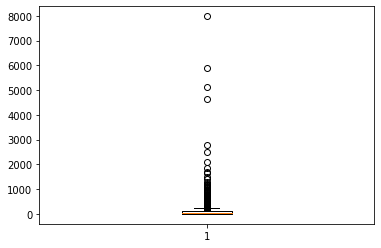

In [31]:
plt.boxplot(grouped_df['frequency'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1c155fd4cd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c155fdf3d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c155fd4970>],
 'medians': [<matplotlib.lines.Line2D at 0x1c155fdfa90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c155fdfdf0>],
 'means': []}

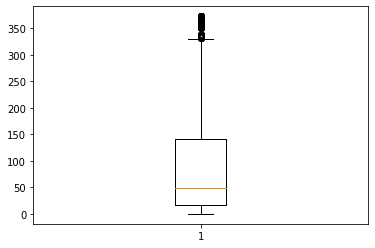

In [32]:
plt.boxplot(grouped_df['recency'])

Two types of ouliers:

statistical
domain specific

In [33]:
# we will remove statistical outliers

#outlier treatment for amount
Q1 = grouped_df.amount.quantile(0.05)
Q3 = grouped_df.amount.quantile(0.95)
IQR = Q3 -Q1
grouped_df = grouped_df[(grouped_df.amount >= Q1 -1.5*IQR)&(grouped_df.amount <= Q3 + 1.5*IQR)]

#outlier treatment for recency
Q1 = grouped_df.recency.quantile(0.05)
Q3 = grouped_df.recency.quantile(0.95)
IQR = Q3 -Q1
grouped_df = grouped_df[(grouped_df.recency >= Q1 -1.5*IQR)&(grouped_df.recency <= Q3 + 1.5*IQR)]

#outlier treatment for frequency
Q1 = grouped_df.frequency.quantile(0.05)
Q3 = grouped_df.frequency.quantile(0.95)
IQR = Q3 -Q1
grouped_df = grouped_df[(grouped_df.frequency >= Q1 -1.5*IQR)&(grouped_df.frequency <= Q3 + 1.5*IQR)]

Rescaling

In [34]:
rfm_df=grouped_df[['amount','frequency','recency']]

In [35]:
import sklearn
from sklearn.preprocessing import StandardScaler

In [36]:
#instantiate
scaler=StandardScaler()

#fit_transform
rfm_df_scaled=scaler.fit_transform(rfm_df)
rfm_df_scaled

array([[-0.72374099, -0.7528903 ,  2.30161144],
       [ 1.73161577,  1.04246493, -0.90646561],
       [ 0.30012569, -0.46363863, -0.18365813],
       ...,
       [-0.67769878, -0.70301932,  0.86589794],
       [-0.62313403, -0.64317415, -0.84705678],
       [ 0.32293601, -0.07464499, -0.50050524]])

In [37]:
rfm_df_scaled.shape

(4293, 3)

In [38]:
#convert to dataframe
rfm_df_scaled=pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns=['amount','frequency','recency']
rfm_df_scaled.head()

,amount,frequency,recency
0,-0.723741,-0.752890,2.301611
1,1.731616,1.042465,-0.906466
2,0.300126,-0.463639,-0.183658
3,0.277515,-0.044722,-0.738141
4,-0.533237,-0.603277,2.143188


# modeling

In [39]:
from sklearn.cluster import KMeans

In [40]:
#k-means with some arbitaray k
kmeans=KMeans(n_clusters=4,max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=4)

In [41]:
kmeans.labels_

array([2, 3, 0, ..., 2, 0, 0])

In [42]:
len(kmeans.labels_)

4293

SSD

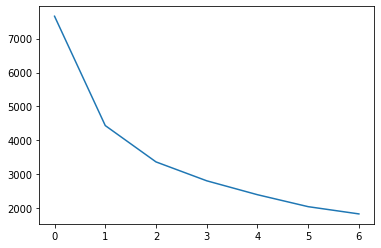

In [43]:
#elbow-curve / SSD
ssd=[]
range_n_clusters=[2,3,4,5,6,7,8]
for num_clusters in range_n_clusters:
    kmeans=KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    ssd.append(kmeans.inertia_)
    
#plot the SSD's for each n_clusters
#ssd
plt.plot(ssd)

Silhouette analysis

In [44]:
#Silhouette analysis

from sklearn.metrics import silhouette_score

range_n_clusters=[2,3,4,5,6,7,8]

for num_clusters in range_n_clusters:
    
    #initialise kmeans
    kmeans=KMeans(n_clusters=num_clusters,max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    cluster_labels=kmeans.labels_
    
    #silhouhette score
    silhouette_avg=silhouette_score(rfm_df_scaled,cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters,silhouette_avg))

For n_clusters=2, the silhouette score is 0.5415853090451498
For n_clusters=3, the silhouette score is 0.5084893722483019
For n_clusters=4, the silhouette score is 0.4813195285107449
For n_clusters=5, the silhouette score is 0.4645986702836259
For n_clusters=6, the silhouette score is 0.41747362647442054
For n_clusters=7, the silhouette score is 0.4148602334674266
For n_clusters=8, the silhouette score is 0.4079479792334521


In [45]:
#final model with k=3

kmeans=KMeans(n_clusters=3,max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=3)

In [46]:
kmeans.labels_

array([0, 2, 1, ..., 0, 1, 1])

In [47]:
#assign the label
grouped_df['cluster_id'] = kmeans.labels_
grouped_df.head()

,Customer ID,amount,frequency,recency,cluster_id
0,12346.0,0.00,2,325,0
1,12347.0,4310.00,182,1,2
2,12348.0,1797.24,31,74,1
3,12349.0,1757.55,73,18,1
4,12350.0,334.40,17,309,0


<AxesSubplot:xlabel='cluster_id', ylabel='amount'>

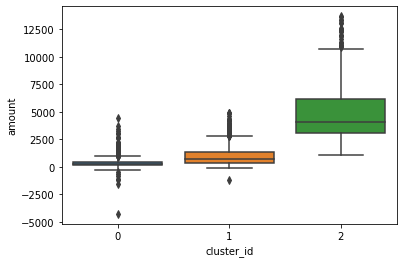

In [48]:
# plot
sns.boxplot(x='cluster_id',y='amount',data=grouped_df)

<AxesSubplot:xlabel='cluster_id', ylabel='recency'>

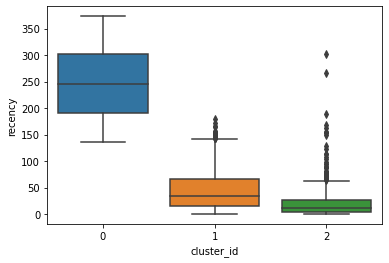

In [49]:
sns.boxplot(x='cluster_id',y='recency',data=grouped_df)

<AxesSubplot:xlabel='cluster_id', ylabel='frequency'>

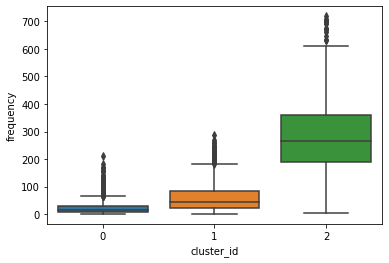

In [50]:
sns.boxplot(x='cluster_id',y='frequency',data=grouped_df)

Hierarchical Clustering

In [51]:
#importing other required libraries
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [52]:
rfm_df_scaled.head()

,amount,frequency,recency
0,-0.723741,-0.752890,2.301611
1,1.731616,1.042465,-0.906466
2,0.300126,-0.463639,-0.183658
3,0.277515,-0.044722,-0.738141
4,-0.533237,-0.603277,2.143188


In [53]:
grouped_df.head()

,Customer ID,amount,frequency,recency,cluster_id
0,12346.0,0.00,2,325,0
1,12347.0,4310.00,182,1,2
2,12348.0,1797.24,31,74,1
3,12349.0,1757.55,73,18,1
4,12350.0,334.40,17,309,0


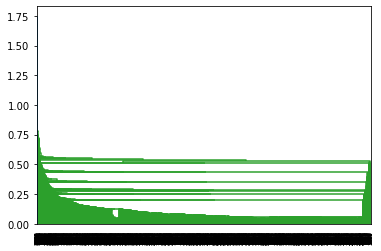

In [54]:
#we will use single linkage to compute intracluster Distance
mergings = linkage(rfm_df_scaled , method="single", metric="euclidean")
dendrogram(mergings)
plt.show()

In [55]:
cut_tree(mergings , n_clusters=3)

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [56]:
cut_tree(mergings , n_clusters=3).shape

(4293, 1)

In [57]:
#we will reshape array of (4293, 1) to a numpy series of (4293 , )
cluster_labels = cut_tree(mergings , n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, ..., 0, 0, 0])

In [58]:
#assign cluster labels
grouped_df['cluster_labels'] = cluster_labels
grouped_df.head()

,Customer ID,amount,frequency,recency,cluster_id,cluster_labels
0,12346.0,0.00,2,325,0,0
1,12347.0,4310.00,182,1,2,0
2,12348.0,1797.24,31,74,1,0
3,12349.0,1757.55,73,18,1,0
4,12350.0,334.40,17,309,0,0


<AxesSubplot:xlabel='cluster_labels', ylabel='amount'>

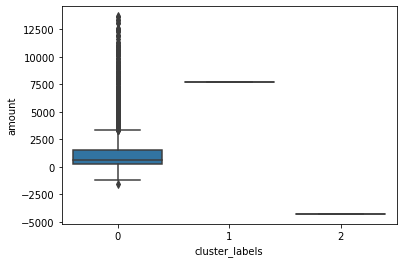

In [59]:
#plots
sns.boxplot(x='cluster_labels' , y ='amount', data=grouped_df)

<AxesSubplot:xlabel='cluster_labels', ylabel='frequency'>

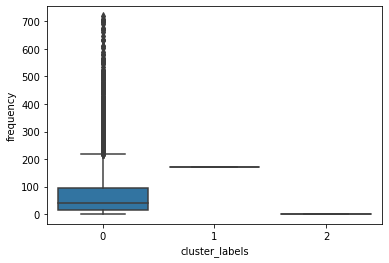

In [60]:
sns.boxplot(x='cluster_labels' , y ='frequency', data=grouped_df)

<AxesSubplot:xlabel='cluster_labels', ylabel='recency'>

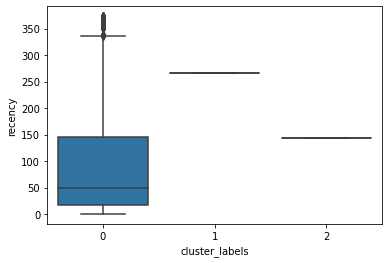

In [61]:
sns.boxplot(x='cluster_labels' , y ='recency', data=grouped_df)